In [16]:
import tensorflow
import os

In [9]:
import cv2
from PIL import Image

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [10]:
def get_image_format(image_path):
    try:
        with Image.open(image_path) as img:
            return img.format.lower()  # Example: 'jpeg', 'png'
    except Exception as e:
        print(f"Error: {e}")
        return None

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = get_image_format(image_path)
            if tip not in image_exts:
                print('Image not in the extensions list')
                os.remove(image_path)
        except Exception as e:
            print('Issue with image')

Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list
Image not in the extensions list


In [17]:
import tensorflow as tf

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 341 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch = data_iterator.next()

In [33]:
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

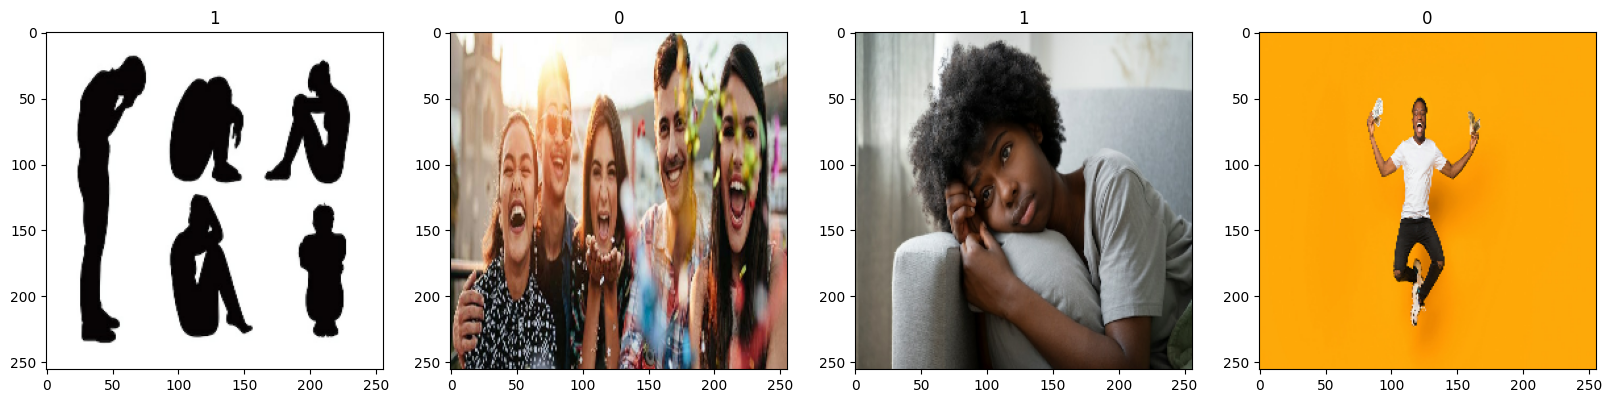

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [60]:
data = data.map(lambda x,y: (x/255, y))

In [61]:
iterator = data.as_numpy_iterator()

In [62]:
batch = iterator.next()

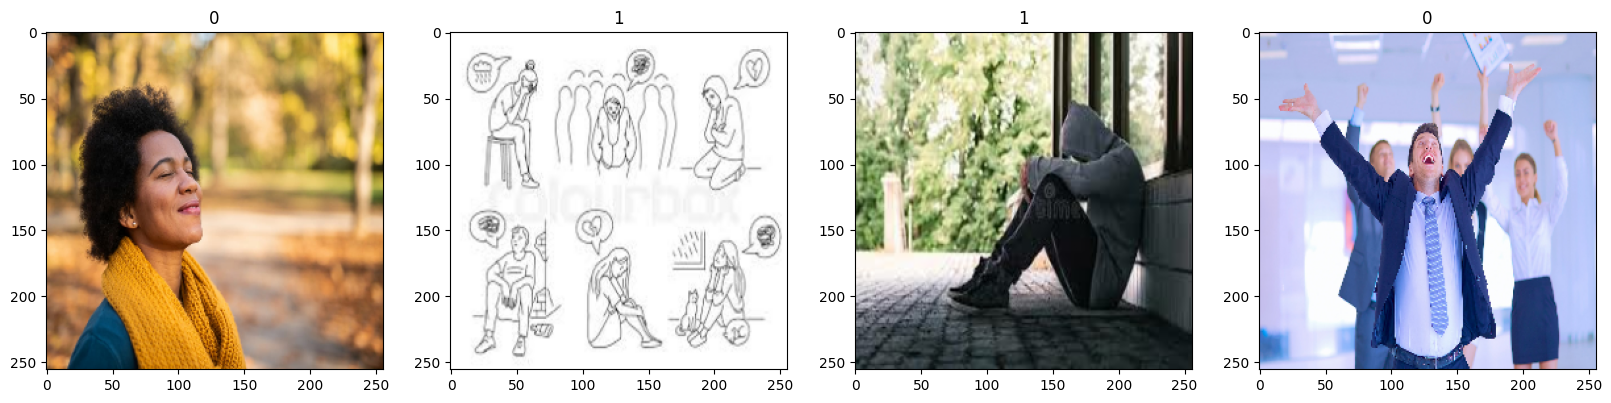

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [65]:
len(data)

11

In [75]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*.1)

In [76]:
len(data)==train_size+val_size+test_size

True

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [101]:
model = Sequential()

In [102]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
logdir='logs'

In [106]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [107]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.5634 - loss: 0.8739 - val_accuracy: 0.6719 - val_loss: 0.6400
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.6607 - loss: 0.6060 - val_accuracy: 0.8125 - val_loss: 0.3981
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.7328 - loss: 0.5247 - val_accuracy: 0.8750 - val_loss: 0.4182
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.8300 - loss: 0.3937 - val_accuracy: 0.8906 - val_loss: 0.2602
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.8737 - loss: 0.2895 - val_accuracy: 0.9062 - val_loss: 0.2299
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.9117 - loss: 0.2282 - val_accuracy: 0.9688 - val_loss: 0.1889
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9546 - loss: 0.1830 - val_accuracy: 0.9844 - val_loss: 0.1003
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.9256 - loss: 0.1568 - val_accuracy: 0.9688 - val_loss:

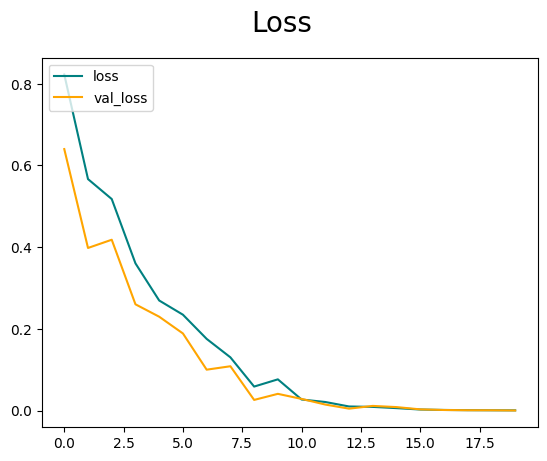

In [108]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

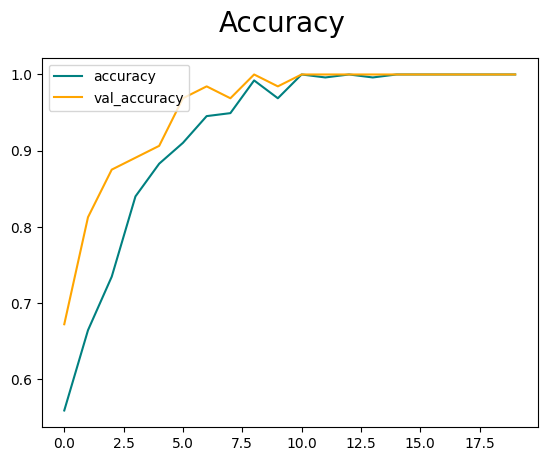

In [109]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [110]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [111]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [112]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [113]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


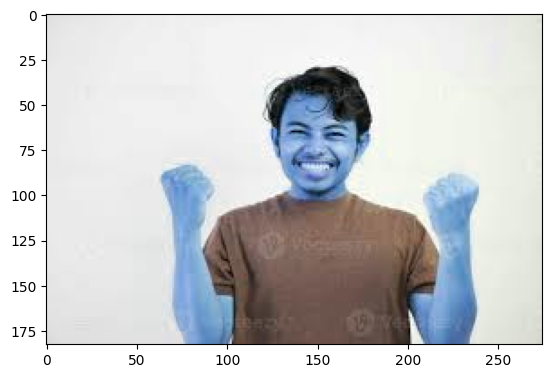

In [190]:
img = cv2.imread('test.png')
plt.imshow(img)
plt.show()

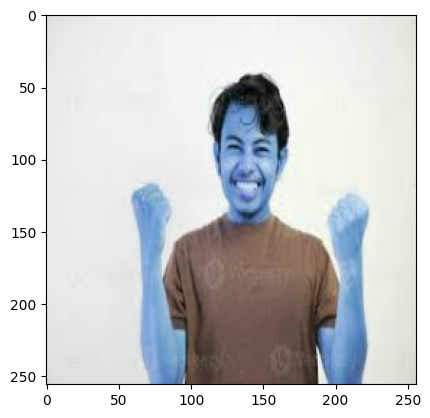

In [191]:
img = tf.image.resize(img, (256,256))
plt.imshow(img.numpy().astype(int))
plt.show()

In [192]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [193]:
print(yhat)
if yhat > 0.5: 
    print('The person is Sad')
else:
    print('The person is Happy')

[[0.98462385]]
The person is Sad
